# Sales Analysis
Questions addressed in this analysis:
1. What was the best month for sales? How much money was earned?
2. Which US city had the highest number of sales
3. What time should we display advertisements to maximise the likelihood of customers buying products
4. Which products are most often sold together?

Import libraries

In [3]:
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

Import the data

In [15]:
path = 'C:\\Users\\Stanford\\Documents\\Personal\\Coding\\Data analysis\\Data Science Tasks\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Data'

all_months_data = pd.DataFrame() # Creates an empty DataFrame

# List all the files in the directory
files = [file for file in os.listdir(path)]

# Loop to concatenate the files
for file in files:
    df = pd.read_csv(path+'\\'+file)
    all_months_data = pd.concat([all_months_data, df])

# Export the data to csv
all_months_data.to_csv('all_data.csv', index=False)

Import the new DataFrame

In [16]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Clean up the data

In [28]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

There are 545 null values. Let's get an understanding of where these are located.

In [29]:
# Display of the rows with NaN values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are full rows of NaN values. Therefor all these records can be deleted.

In [30]:
# Drop all the NaN value rows
df.dropna(axis=0,inplace=True)

# Count the NaN value rows
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [ ]:
# Convert the Quantity Ordered to type float
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
df['Price Each'] = df['Price Each'].astype(float)

#### 1. What was the best month for sales? How much money was earned?
1. Extract the month from the date string
2. Create a total value column
3. Group by month to get the sales per month

In [32]:
# Extract the month from the date string
df['Month'] = df['Order Date'].str[0:2]


In [33]:
# Print all the unique values in the Month column
df['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [34]:
# Find the rows with the 'Or' values
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [35]:
# Create a new DataFrame without the heading duplicated
df = df[df['Month'] != 'Or']

In [36]:
# Convert the month string to int
df.Month = df.Month.astype(int)

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [41]:
# Calculate the total value
df['Total Value'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [59]:
# Group Total value by month
Total_sales_pm = df.groupby('Month').agg({'Total Value':[('Total','sum')]})

# Drop multi-index for columns 
Total_sales_pm.columns = Total_sales_pm.columns.droplevel()
Total_sales_pm.reset_index(inplace=True)

# Sort in descending order and extract one
Total_sales_pm.sort_values('Total', ascending=False).head(1)


,Month,Total
11,12,4613443.34


In [60]:
Total_sales_pm

,Month,Total
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


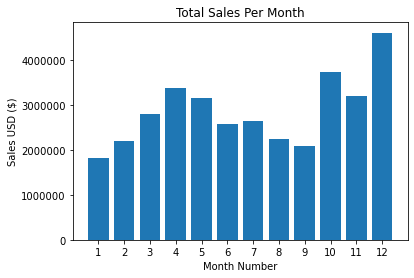

In [66]:
# Plot the sales
plt.bar(Total_sales_pm.Month, Total_sales_pm.Total)
plt.xticks(Total_sales_pm.Month)
plt.ticklabel_format(style='plain')
plt.xlabel('Month Number')
plt.ylabel('Sales USD ($)')
plt.title('Total Sales Per Month')
plt.show()

#### 2. Which US city had the highest number of sales

How I'm going to tackle it:
1. Extract the city out of the Purchase Address
2. Group the data by that city

In [106]:
# Extract the city from Purchase Address
# df['City'] = df['Purchase Address'].str.split(',').str[-2]
df['State'] = df['Purchase Address'].str.split(',').str[-1].str.split().str[0]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,City,State
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


Next I'll check whether only cities were extracted by checking the unique values.

In [112]:
# Verify city uniqueness
df.groupby(['City', 'State']).agg({'City':[('count','count')]})

City
                      count
City           State       
 Atlanta       GA     14881
 Austin        TX      9905
 Boston        MA     19934
 Dallas        TX     14820
 Los Angeles   CA     29605
 New York City NY     24876
 Portland      ME      2455
               OR     10010
 San Francisco CA     44732
 Seattle       WA     14732

In [113]:
# Group by city
sales_by_city = df.groupby(['City', 'State']).agg({'Total Value':[('Total Sales','sum')]})

# Drop the multi index
sales_by_city.columns = sales_by_city.columns.droplevel()

# Reset the index
sales_by_city.reset_index(inplace=True)

# Sort and extract top performer
sales_by_city.sort_values('Total Sales', ascending=False).head(1)

,City,State,Total Sales
8,San Francisco,CA,8262203.91


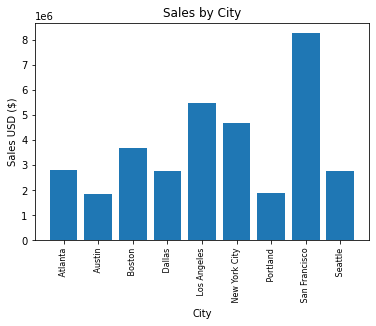

In [117]:
# Plot the results
plt.bar(sales_by_city.City, sales_by_city['Total Sales'])
plt.ylabel('Sales USD ($)')
plt.xlabel('City')
plt.xticks(sales_by_city.City.unique(), rotation='vertical', size=8)
plt.title('Sales by City')
#plt.ticklabel_format(useOffset=False)
#plt.ticklabel_format(style='plain')
plt.show()

#### 3. What time should we display advertisements to maximise the likelihood of customers buying products

In [132]:
# Convert the to datetime dtype
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Extract the hour
df['Order Time'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,City,State,Order Time
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [136]:
# Group the data by hour
sales_by_hour = df.groupby('Order Time').agg({'Total Value':[('Total Sales', 'count')]})

# Drop multi index level
sales_by_hour.columns = sales_by_hour.columns.droplevel()

# Re_index
sales_by_hour.reset_index(inplace=True)

# Order the table and select top performer
sales_by_hour.sort_values('Total Sales', ascending=False).head(1)


,Order Time,Total Sales
19,19,12905


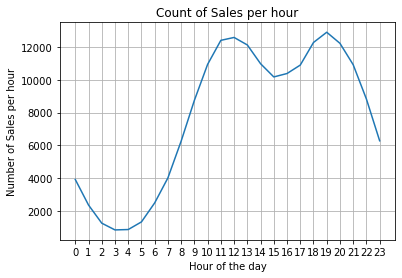

In [139]:
# Graph the sales per hour
plt.plot(sales_by_hour['Order Time'], sales_by_hour['Total Sales'])
plt.xticks(sales_by_hour['Order Time'])
plt.xlabel('Hour of the day')
plt.ylabel('Number of Sales per hour')
plt.title('Count of Sales per hour')
plt.grid()
plt.show()

The best times to display advertisements (accross all cities) to maximise the likelihood of customers buying products is:
* 11:00 - 12:00 AM
* 18:00 - 19:00

#### 4. Which products are most often sold together?

In [140]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,City,State,Order Time
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [163]:
# Identify the duplicated Order IDs
multiple_orders = df[df['Order ID'].duplicated(keep=False)]

# Concat the products sold together
multiple_orders['Grouped'] = multiple_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Remove duplicates
multiple_orders = multiple_orders[['Order ID','Grouped']].drop_duplicates()

# Print first five rows
multiple_orders.head()


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [171]:
# Create a counter object
count = Counter()

# Count the combination of items
for row in multiple_orders['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print('The most common combo is', count.most_common(1)[0][0],
      'sold', count.most_common(1)[0][1], 'times')

The most common combo is ('iPhone', 'Lightning Charging Cable') sold 1005 times


#### 5. What product sold the most and why? 

In [181]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,City,State,Order Time
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [199]:
# Group the products sold
# most_sold_product = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
# most_sold_product.head(1)

# Group the products sold with average price
most_sold_product = df.groupby('Product').agg({
    'Quantity Ordered':[('total quantity', 'sum')],
    'Price Each':[('avg price', 'mean')]})

# Drop multi index
most_sold_product.columns = most_sold_product.columns.droplevel()

# Reset the index
most_sold_product.reset_index(inplace=True)

# Sort the table
most_sold_product = most_sold_product.sort_values('total quantity', ascending=False)

most_sold_product.head()

,Product,total quantity,avg price
5,AAA Batteries (4-pack),31017.0,2.99
4,AA Batteries (4-pack),27635.0,3.84
15,USB-C Charging Cable,23975.0,11.95
12,Lightning Charging Cable,23217.0,14.95
17,Wired Headphones,20557.0,11.99


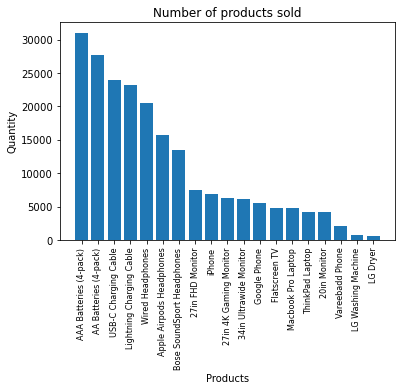

In [200]:
# Graph the products sold
plt.bar(most_sold_product['Product'], most_sold_product['total quantity'])
plt.xticks(most_sold_product['Product'], rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Number of products sold')
plt.show()

C:\Users\Stanford\AppData\Local\Temp\ipykernel_5276\4104109001.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_sold_product['Product'], rotation='vertical', size=8)


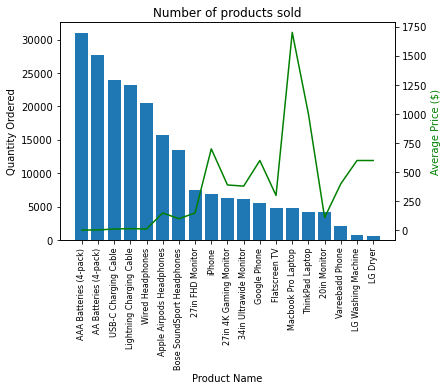

In [201]:
# Graph the number of products sold overlay with price
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(most_sold_product['Product'], most_sold_product['total quantity'])
ax2.plot(most_sold_product['Product'], most_sold_product['avg price'], color='g')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Average Price ($)', color='g')
ax1.set_xticklabels(most_sold_product['Product'], rotation='vertical', size=8)
ax1.set_title('Number of products sold')
plt.show()

AAA Batteries (4-pack) is the most sold product. These are cheap consumable products.